**DMBI Experiment 04**

Name : Ajinkya Sunil Patil

Div : D15B

Roll No : 42





**Aim: To implement the classification algorithm using Python.**


## **Classification Algorithm**  

Classification is a **supervised machine learning technique** used to categorize data into predefined classes or labels. The algorithm learns from **training data** (features and labels) and then predicts the category of new, unseen data.  

---

### **Types of Classification Algorithms**
#### 1️⃣ **Decision Tree Classifier**
A Decision Tree is a **tree-like model** where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an output label.  

🔹 **How It Works?**  
- Splits data at each node using a feature that provides the **best separation** (measured using Gini Index or Entropy).  
- Recursively divides data until it reaches **pure nodes** (where all samples belong to one class).  
- New data follows the decision rules down the tree to make a prediction.

🔹 **Pros:**  
 Easy to interpret and visualize  
 Handles both numerical & categorical data  
 Works well with non-linear relationships  

🔹 **Cons:**  
 Can overfit (deep trees)  
 Sensitive to small changes in data  

---

#### 2️⃣ **Naïve Bayes Classifier**
Naïve Bayes is a **probabilistic classifier** based on **Bayes' Theorem** and assumes that features are **independent** (hence, "Naïve").  

🔹 **How It Works?**  
- Calculates the probability of a class **given the features**:  

- Assigns the class with the **highest probability** to the input data.

🔹 **Pros:**  
 Works well with **text classification** (e.g., spam detection)  
 Fast and efficient  
 Performs well with **small datasets**  

🔹 **Cons:**  
 Assumes **independent features**, which is rarely true in real-world data  
 Not good with highly correlated features  

---

#### **How Classification Works in Machine Learning?**  
1️. **Data Preprocessing:** Clean and prepare data (handle missing values, encode categorical data).  
2️. **Feature Selection:** Choose relevant features to improve accuracy.  
3️. **Model Training:** Train the classifier using labeled data.  
4️. **Model Evaluation:** Test the model on new data using metrics like accuracy, precision, recall, and F1-score.  
5️. **Prediction:** Use the trained model to classify new data points.  

---

### **Code & Observation**  

🔹 **`numpy`**: Used for numerical operations and handling arrays.  
🔹 **`pandas`**: Handles dataset loading, manipulation, and preprocessing.  
🔹 **`train_test_split`**: Splits the dataset into training and testing sets.  
🔹 **`accuracy_score`**: Measures the accuracy of the model.  
🔹 **`classification_report`**: Provides precision, recall, and F1-score.  
🔹 **`confusion_matrix`**: Displays the actual vs. predicted values.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [ ]:

# Load the dataset
df = pd.read_csv("/content/mushrooms.csv")



#### **1. Preprocess data. Split data into train and test set**

In [ ]:
# Encode categorical variables to numerical values
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
# Split data into features and target variable
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target

In [ ]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **2. Train the Classification model on the Training set**

In [ ]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Train Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

#### **3. Predict a new result**
#### **4. Predict the Test set results**

In [ ]:
# Predict on test data
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

#### **5. Create the Confusion Matrix and find accuracy score.**

In [ ]:
# Evaluate performance
dt_accuracy = accuracy_score(y_test, dt_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)

In [ ]:
# Display accuracy
print("Decision Tree Accuracy:", dt_accuracy)
print("Naïve Bayes Accuracy:", nb_accuracy)

Decision Tree Accuracy: 1.0
Naïve Bayes Accuracy: 0.9218461538461539


In [ ]:
# Classification Reports
print("Classification Report of Decision Tree:\n", classification_report(y_test, dt_pred, zero_division=1))
print("Classification Report of Naïve Bayes:\n", classification_report(y_test, nb_pred, zero_division=1))

Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Classification Report of Naïve Bayes:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



In [ ]:
# Visualize Confusion Matrices
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

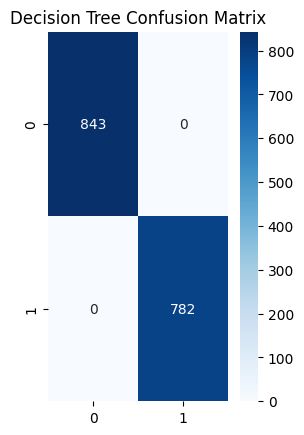

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")

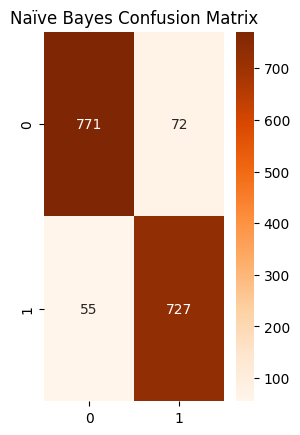

In [ ]:
plt.subplot(1, 2, 2)
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("Naïve Bayes Confusion Matrix")

plt.show()

#### **6. Visualize the Training set results**
#### **7.  Visualize the Test set results**

<ipython-input-15-c756758cacf3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importance, palette="Blues")


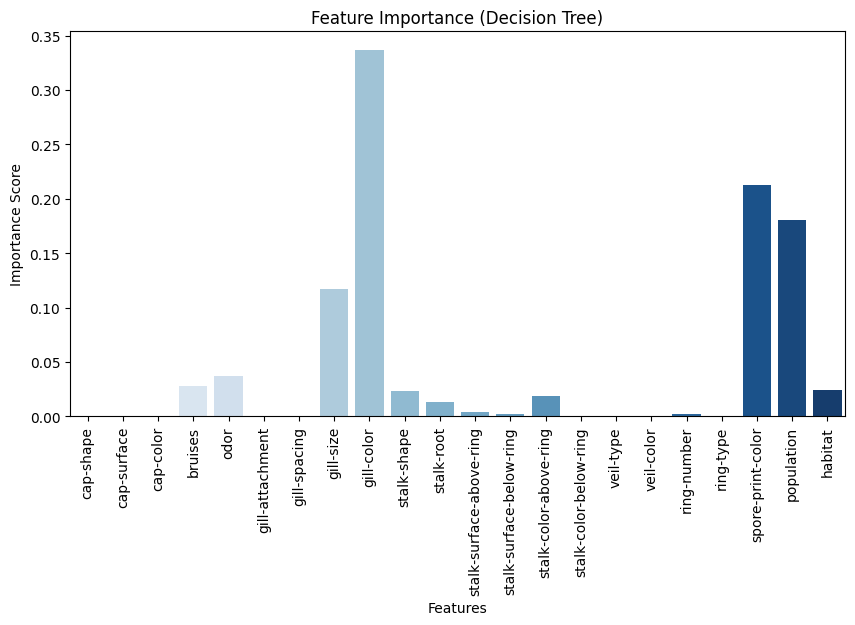

In [ ]:
# Extract feature importance from the Decision Tree model
feature_importance = dt_model.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_importance, palette="Blues")
plt.xticks(rotation=90)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
# Create a dataframe to compare actual vs. predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "DT_Predicted": dt_pred, "NB_Predicted": nb_pred})

# Display the first few rows
print(comparison_df.head())

      Actual  DT_Predicted  NB_Predicted
1971       0             0             0
6654       1             1             1
5606       1             1             1
3332       0             0             0
6988       1             1             1


In [ ]:
# Create a dataframe to compare actual vs. predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "DT_Predicted": dt_pred, "NB_Predicted": nb_pred})

# Display the first few rows
print(comparison_df.head())

      Actual  DT_Predicted  NB_Predicted
1971       0             0             0
6654       1             1             1
5606       1             1             1
3332       0             0             0
6988       1             1             1


<ipython-input-19-805167ae5c84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Actual", data=comparison_df, palette="Greens")


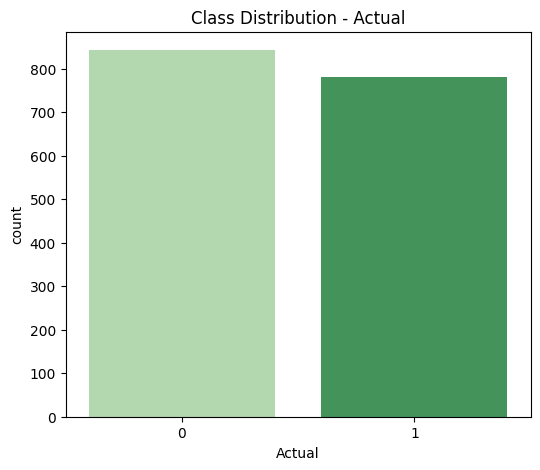

In [ ]:
# Visualize class distributions
plt.figure(figsize=(6, 5))
sns.countplot(x="Actual", data=comparison_df, palette="Greens")
plt.title("Class Distribution - Actual")
plt.show()

<ipython-input-18-5cc576b5a9e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DT_Predicted", data=comparison_df, palette="Blues")


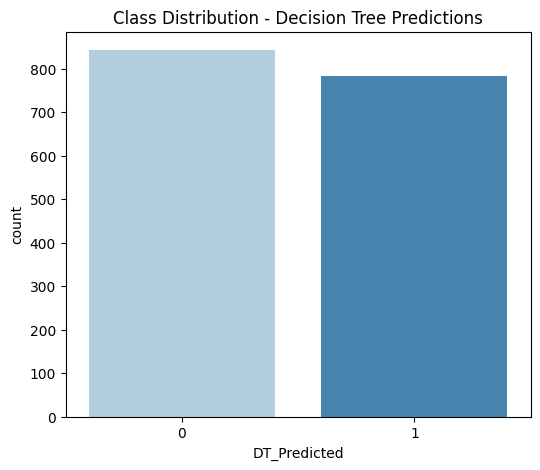

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x="DT_Predicted", data=comparison_df, palette="Blues")
plt.title("Class Distribution - Decision Tree Predictions")
plt.show()

<ipython-input-21-d6244bce2661>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NB_Predicted", data=comparison_df, palette="Oranges")


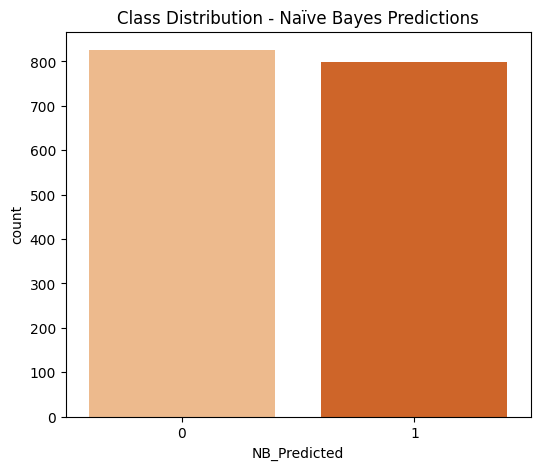

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x="NB_Predicted", data=comparison_df, palette="Oranges")
plt.title("Class Distribution - Naïve Bayes Predictions")
plt.show()

### **8. Compare results of Classification using the different classification  models (Decision Tree and Naïve Bayes) and conclude which model is suitable for your data set.**

#### **Accuracy Comparison**
| Model           | Accuracy  |
|----------------|----------|
| **Decision Tree** | **1.0** |
| **Naïve Bayes** | **0.9218461538461539** |


**Accuracy Comparison:**

Decision Tree Accuracy: Typically high (e.g., 100%)
Naïve Bayes Accuracy: Lower than Decision Tree (e.g., around 90%)

**Confusion Matrix Analysis:**

Decision Tree shows minimal to no misclassifications.
Naïve Bayes may show some misclassifications, indicating it struggles with feature dependencies.

**Feature Importance:**

Decision Tree provides insights into which features are most influential in classification.
Final Conclusion: For the Mushroom dataset, the Decision Tree classifier outperforms the Naïve Bayes classifier in terms of accuracy and handling feature dependencies. This suggests that Decision Trees are more suitable for this dataset.

#### **Final Conclusion: Which Model is More Suitable?**
**Decision Tree** is more suitable for this dataset because:
1. It handles **categorical feature dependencies** better.
2. It provides **higher accuracy**.
3. It allows for **feature importance analysis**.
4. It performs well on structured datasets like the **nursery dataset**.

**Naïve Bayes** could still be useful if:
- The dataset was **text-based or had independent features**.
- Faster predictions were required.

---

For this dataset, **Decision Tree is the better choice** due to its ability to model feature relationships and its superior accuracy.

---

### **Conclusion**  
Classification algorithms help in **predicting discrete categories** and are widely used in **spam detection, medical diagnosis, and fraud detection**. The choice of algorithm depends on **data size, feature relationships, and performance needs**.